In [2]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places

C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
results = pd.read_csv('results_csv_rf.csv')

results

,Road,MAE,MSE,R2
0,432,0.6460,0.7541,0.6086
1,433,0.5558,0.5198,0.5469
2,436,0.7341,0.8944,0.4246
3,457,0.7926,1.0161,0.5950
4,1402,2.6114,11.0913,0.3818
5,1518,0.6400,0.7078,0.5561
6,1882,0.4857,0.4499,0.9146
7,2086,0.5220,0.4563,0.1989
8,2087,0.5706,0.5469,0.3475
9,2088,0.6396,0.7744,0.5163


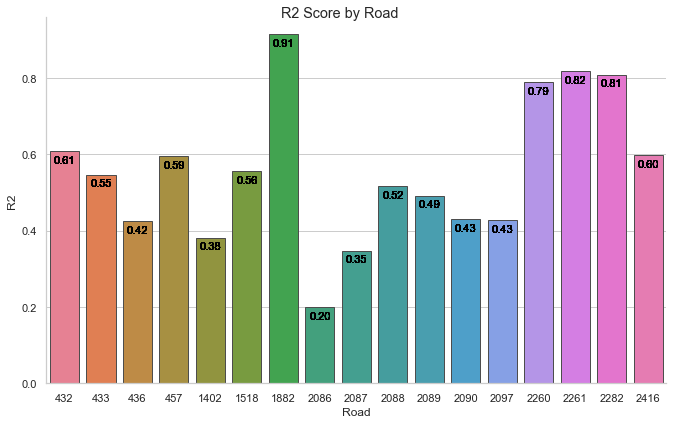

In [15]:
#plt.figure(figsize=(12, 8))

#result = results.groupby(["Road"])['R2'].aggregate(np.median).reset_index().sort_values('R2')
#sns.barplot(x='Road', y="R2", data=result, order=result['Road']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
#plt.show()
sns.set(style="whitegrid")
b = sns.catplot(x="Road", y="R2", data=results, palette = "husl",edgecolor=".3", kind='bar', height=6, aspect=8/5) #.set_title('R2 Score by Road')
op2 = b.fig.suptitle('R2 Score by Road')

ax2=b.ax 
def annotateBars(row, ax=ax2): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, -9),
        textcoords='offset points') 
        
plot2 = results.apply(annotateBars, ax=ax2, axis=1)

<Figure size 864x576 with 0 Axes>

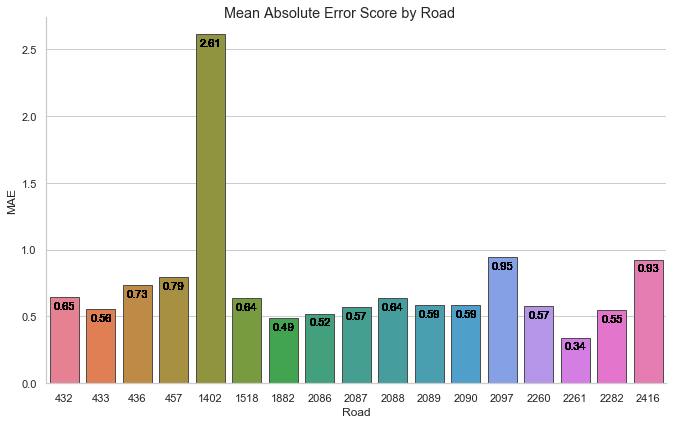

In [16]:
plt.figure(figsize=(12, 8))

#sns.set(style="whitegrid")
#ax = sns.barplot(x="Road", y="MAE", data=results, palette = "pastel",edgecolor=".3").set_title('Mean Absolute Error Score by Road')


sns.set(style="whitegrid")
b = sns.catplot(x="Road", y="MAE", data=results, palette = "husl",edgecolor=".3", kind='bar', height=6, aspect=8/5) #.set_title('R2 Score by Road')
op2 = b.fig.suptitle('Mean Absolute Error Score by Road')

ax2=b.ax 
def annotateBars(row, ax=ax2): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, -9),
        textcoords='offset points') 
        
plot2 = results.apply(annotateBars, ax=ax2, axis=1)

<Figure size 864x576 with 0 Axes>

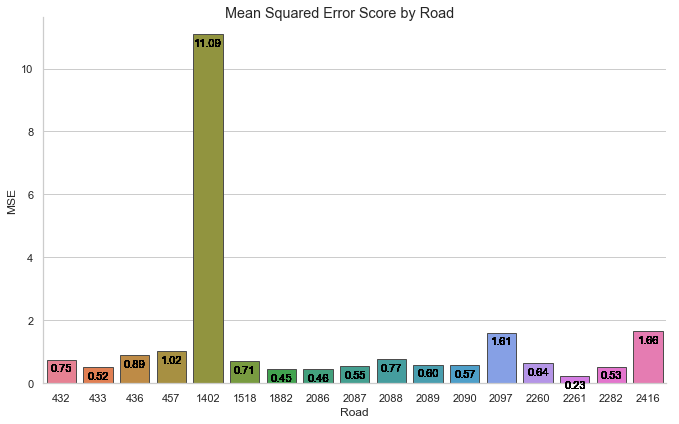

In [17]:
plt.figure(figsize=(12, 8))

#sns.set(style="whitegrid")
#ax = sns.barplot(x="Road", y="MSE", data=results, palette = "pastel",edgecolor=".3").set_title('Mean Squared Error Score by Road')


sns.set(style="whitegrid")
b = sns.catplot(x="Road", y="MSE", data=results, palette = "husl",edgecolor=".3", kind='bar', height=6, aspect=8/5) #.set_title('R2 Score by Road')
op2 = b.fig.suptitle('Mean Squared Error Score by Road')

ax2=b.ax 
def annotateBars(row, ax=ax2): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, -9),
        textcoords='offset points') 
        
plot2 = results.apply(annotateBars, ax=ax2, axis=1)

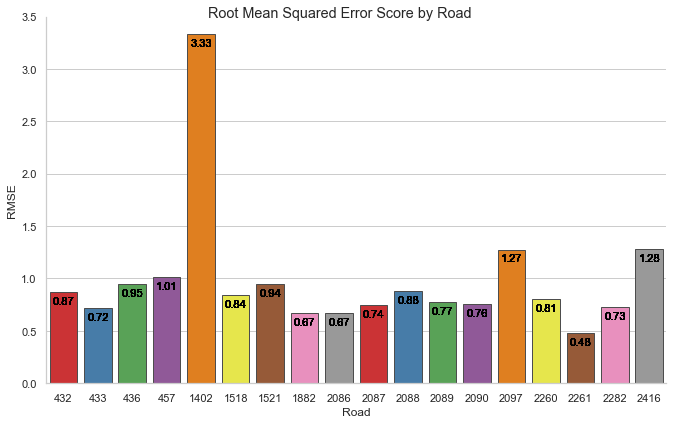

In [74]:
#plt.figure(figsize=(12, 8))

#sns.set(style="whitegrid")
#ax = sns.barplot(x="Road", y="RMSE", data=results, palette = "pastel",edgecolor=".3").set_title('Root Mean Squared Error Score by Road')


sns.set(style="whitegrid")
b = sns.catplot(x="Road", y="RMSE", data=results, palette = "Set1",edgecolor=".3", kind='bar', height=6, aspect=8/5) #.set_title('R2 Score by Road')
op2 = b.fig.suptitle('Root Mean Squared Error Score by Road')

ax2=b.ax 
def annotateBars(row, ax=ax2): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, -9),
        textcoords='offset points') 
        
plot2 = results.apply(annotateBars, ax=ax2, axis=1)

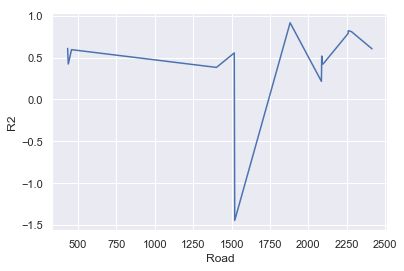

In [18]:
ax = sns.lineplot(x="Road", y="R2", data=results, ci=None)

In [19]:
# Results boxplot

results2 = pd.read_csv('all_results_csv.csv')

results2

,Road,Score,Method,Metric
0,432,0.6460,Random Forest,MAE
1,433,0.5558,Random Forest,MAE
2,436,0.7341,Random Forest,MAE
3,457,0.7926,Random Forest,MAE
4,1402,2.6114,Random Forest,MAE
5,1518,0.6400,Random Forest,MAE
6,1882,0.4857,Random Forest,MAE
7,2086,0.5220,Random Forest,MAE
8,2087,0.5706,Random Forest,MAE
9,2088,0.6396,Random Forest,MAE


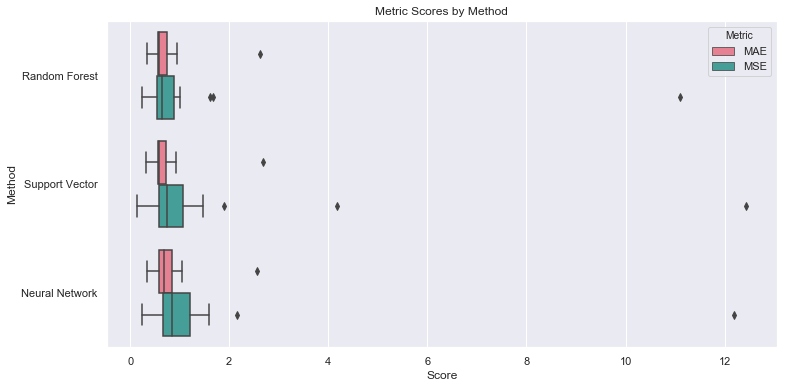

In [39]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
ax = sns.boxplot(x="Score", y="Method", hue="Metric", data=results2, palette="husl").set_title('Metric Scores by Method')

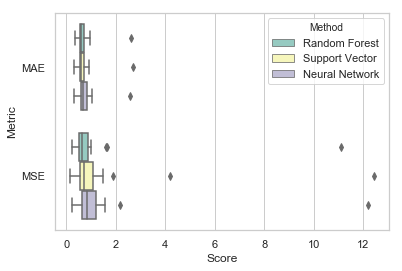

In [21]:
ax = sns.boxplot(x="Score", y="Metric", hue="Method", data=results2, palette="Set3")